In [1]:
import numpy as np

import basc

import astropy
from astropy.table import Table
from astropy.io import fits

# silent Warning, when open image using aplpy
import warnings
from astropy.utils.exceptions import AstropyWarning 
warnings.simplefilter('ignore', category=AstropyWarning)

import matplotlib
import matplotlib.pyplot as plt

import aplpy

basc.readConfig("config.txt")

%matplotlib inline

/scratch/home/rwibowo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
image_file = 'uid___A002_Xbd203b_X1d77.ms.split.cal-CALIBRATE_PHASE-J1150+2417.ms.cont4.image.fits'
psf_file   = 'uid___A002_Xbd203b_X1d77.ms.split.cal-CALIBRATE_PHASE-J1150+2417.ms.cont4.psf.fits'
flux_file  = 'uid___A002_Xbd203b_X1d77.ms.split.cal-CALIBRATE_PHASE-J1150+2417.ms.cont4.flux.fits'

In [3]:
fits.info(image_file)

Filename: uid___A002_Xbd203b_X1d77.ms.split.cal-CALIBRATE_PHASE-J1150+2417.ms.cont4.image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     951   (200, 200, 1, 1)   float32   


In [4]:
image_data = fits.getdata(image_file)
psf_data = fits.getdata(psf_file)
flux_data = fits.getdata(flux_file)

In [5]:
image_data.shape

(1, 1, 200, 200)

In [6]:
image_data[0][0].shape

(200, 200)

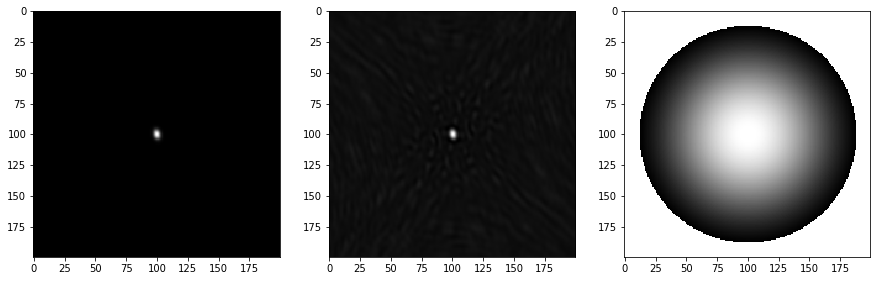

In [7]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(image_data[0][0], cmap='gray')

plt.subplot(132)
plt.imshow(psf_data[0][0], cmap='gray')

plt.subplot(133)
plt.imshow(flux_data[0][0], cmap='gray')

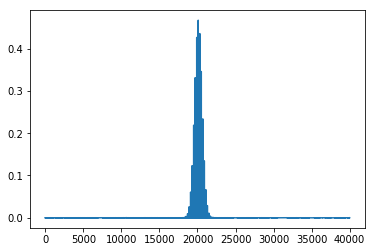

In [8]:
plt.plot(image_data[0][0].flatten())

In [9]:
rmsB6 = 7.63890893722e-05
multp = np.array([3, 3.5, 4.5, 5, 5.5, 6, 10, 20])
lvlB6 = rmsB6*multp

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -1.553e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.462e-02 [aplpy.core]


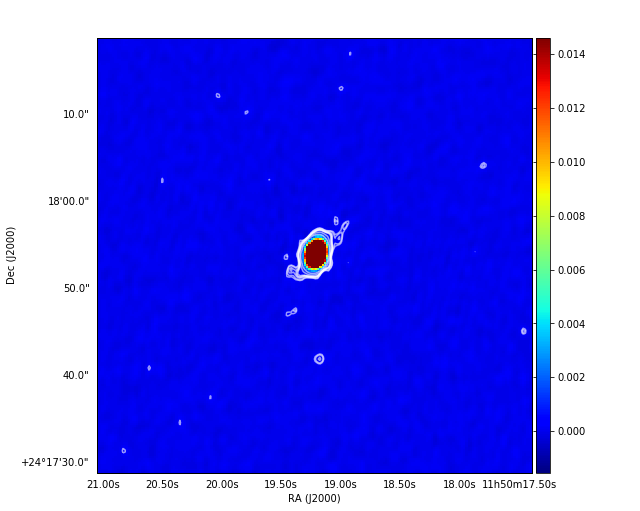

In [10]:
image = aplpy.FITSFigure(image_file)
image.show_colorscale()#tretch='power', exponent=0.3)
image.show_colorbar()
image.show_contour(colors='white', levels=lvlB6, alpha=0.6)

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -3.256e-02 [aplpy.core]
INFO: Auto-setting vmax to  4.526e-02 [aplpy.core]


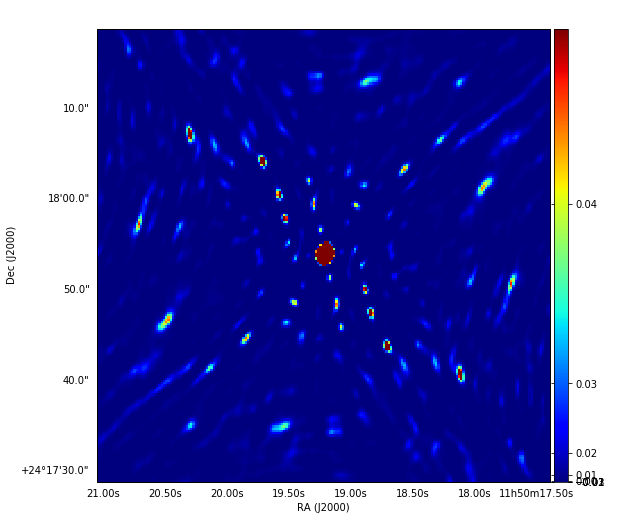

In [11]:
psf = aplpy.FITSFigure(psf_file)
psf.show_colorscale(stretch='power', exponent=7)
psf.show_colorbar()
#psf.show_contour()

In [12]:
# RMS: 